<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb)</a></span><ul class="toc-item"><li><span><a href="#Золото-(Au)" data-toc-modified-id="Золото-(Au)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Золото (Au)</a></span></li><li><span><a href="#Серебро-(Ag)" data-toc-modified-id="Серебро-(Ag)-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Серебро (Ag)</a></span></li><li><span><a href="#Свинец-(Pb)" data-toc-modified-id="Свинец-(Pb)-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Свинец (Pb)</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Размеры-гранул-сырья" data-toc-modified-id="Размеры-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Размеры гранул сырья</a></span></li><li><span><a href="#Концентрация-веществ" data-toc-modified-id="Концентрация-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Концентрация веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li></ul></div>

# Восстановление золота из руды

Представим, что мы работаем в компании, которая разрабатывает решения для эффективной работы промышленных предприятий. И к нам обратились из золотодобывающего предприятия, чтобы мы подготовили прототип модели машинного обучения. Модель наша должна предсказать коэффициент восстановления золота из золотосодержащей руды. В наше распоряжение предоставленны данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Также работники золотодобывающего предприятия описали кратко технологический процесс.

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

Описание каждой стадии:
1. **Флотация**

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

2. **Очистка**

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.


Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
# в случае конфликта библиотек на трекере раскомментировать и запустить первую ячейку с кодом
#!pip install -U your_library

In [2]:
# импортируем все необходимые библиотеки
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 200)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# загружаем файлы
try: # подгружаем данные с платформы...
    full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv', parse_dates=['date'])
    train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv', parse_dates=['date'])
    test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv', parse_dates=['date'])
except: # ...в случае работы локально грузим данные из локального расположения
    full_data = pd.read_csv('c:\\gold_recovery_full_new.csv', parse_dates=['date'])
    train_data = pd.read_csv('c:\\gold_recovery_train_new.csv', parse_dates=['date'])
    test_data = pd.read_csv('c:\\gold_recovery_test_new.csv', parse_dates=['date'])

In [4]:
# просматриваем общую информацию
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null datetime64[ns]
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant     

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null datetime64[ns]
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant     

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
ro

In [7]:
# посмотрим на первые строки таблиц данных
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [8]:
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [9]:
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid">
    
Из выведенной информации выше на экран, мы видим, что в исходной и обучающей выборках есть 87 столбцов признаков отражающие различные этапы флотации/очистки золотосодержащей руды, фиксируемой по времени с разницей в один час. А в выборке тесте (`test_data`) мы обнаружили 53 столбца с признаками. Ниже мы попробуем определить эти отсутствующие признаки. Но перед этим проверим правильность расчёта эффективности обогащения.

</div>

In [10]:
# проверяем эффективность обогащения по формуле, и результаты выводим в отдельный столбец
train_data['recovery'] = (
    (train_data['rougher.output.concentrate_au'] * (train_data['rougher.input.feed_au'] - train_data['rougher.output.tail_au'])) / 
    (train_data['rougher.input.feed_au'] * (train_data['rougher.output.concentrate_au'] - train_data['rougher.output.tail_au'])) * 
    100
)

In [11]:
# смотрим на результаты проверки
train_data['recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: recovery, dtype: float64

In [12]:
# находим MAE между нашими расчётами и значением признака
print(f"MAE между нашими расчётами и значением признака = {mean_absolute_error(train_data['rougher.output.recovery'], train_data['recovery']):.2f}")

MAE между нашими расчётами и значением признака = 0.00


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> 
    
Проверка расчёта эффективности обогащения и MAE показали, что разница нулевая. Т.е. расчёт эффективности верный. 

Далее проанализируем признаки недоступные в тестовой выборке.

</div>

In [13]:
# заносим в переменные списки названия столбцов
train_list_columns = train_data.columns.values.tolist()
test_list_columns = test_data.columns.values.tolist()

# вычисляем список различий
difference_list = pd.Series(list(set(train_list_columns) - set(test_list_columns))).sort_values()

# выводим на экран
print(f'Количество признаков недоступных в тестовой выборке = {difference_list.count()}')
print(f'Список недоступных признаков:\n {difference_list}')

Количество признаков недоступных в тестовой выборке = 35
Список недоступных признаков:
 6                           final.output.concentrate_ag
31                          final.output.concentrate_au
1                           final.output.concentrate_pb
34                         final.output.concentrate_sol
8                                 final.output.recovery
4                                  final.output.tail_ag
16                                 final.output.tail_au
22                                 final.output.tail_pb
33                                final.output.tail_sol
15                primary_cleaner.output.concentrate_ag
9                 primary_cleaner.output.concentrate_au
29                primary_cleaner.output.concentrate_pb
2                primary_cleaner.output.concentrate_sol
0                        primary_cleaner.output.tail_ag
24                       primary_cleaner.output.tail_au
28                       primary_cleaner.output.tail_pb
13              

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid">

Так как интересующие нас признаки (тип параметра) находятся после первой точки в названии столбцов, таким образом мы понимаем, что признаки недоступные в тестовой выборке относятся к типу - параметры продукта (output), т.е. то, что получается на выходе после флотации, первичной, и вторичной очистки. Таким образом в тестовой выборке находятся данные о продукте, который поступает на обработку (флотацию, первичную, и вторичную очитски). А также признаки, которые имеют расчётные характеристики.
    
Далее проведём предобработку данных.

</div>

In [14]:
# ниже вычисляем количество и долю пропусков
full_data.isna().agg({'sum', 'mean'}).T

,mean,sum
date,0.000000,0.0
final.output.concentrate_ag,0.000051,1.0
final.output.concentrate_pb,0.000051,1.0
final.output.concentrate_sol,0.010854,211.0
final.output.concentrate_au,0.000000,0.0
final.output.recovery,0.000000,0.0
final.output.tail_ag,0.000051,1.0
final.output.tail_pb,0.005196,101.0
final.output.tail_sol,0.000309,6.0
final.output.tail_au,0.000000,0.0


In [15]:
train_data.isna().agg({'sum', 'mean'}).T

,mean,sum
date,0.000000,0.0
final.output.concentrate_ag,0.000071,1.0
final.output.concentrate_pb,0.000071,1.0
final.output.concentrate_sol,0.014913,211.0
final.output.concentrate_au,0.000000,0.0
final.output.recovery,0.000000,0.0
final.output.tail_ag,0.000000,0.0
final.output.tail_pb,0.007068,100.0
final.output.tail_sol,0.000353,5.0
final.output.tail_au,0.000000,0.0


In [16]:
test_data.isna().agg({'sum', 'mean'}).T

,mean,sum
date,0.000000,0.0
primary_cleaner.input.sulfate,0.000756,4.0
primary_cleaner.input.depressant,0.000945,5.0
primary_cleaner.input.feed_size,0.000000,0.0
primary_cleaner.input.xanthate,0.000756,4.0
primary_cleaner.state.floatbank8_a_air,0.000000,0.0
primary_cleaner.state.floatbank8_a_level,0.000000,0.0
primary_cleaner.state.floatbank8_b_air,0.000000,0.0
primary_cleaner.state.floatbank8_b_level,0.000000,0.0
primary_cleaner.state.floatbank8_c_air,0.000000,0.0


In [17]:
# заполняем пропуски используя значения из предыдущей ячейки
full_data = full_data.fillna(method='ffill')
train_data = train_data.fillna(method='ffill')
test_data = test_data.fillna(method='ffill')

In [18]:
# ниже проверяем заполненные пропуски
full_data.isna().agg({'sum', 'mean'}).T

,mean,sum
date,0.0,0.0
final.output.concentrate_ag,0.0,0.0
final.output.concentrate_pb,0.0,0.0
final.output.concentrate_sol,0.0,0.0
final.output.concentrate_au,0.0,0.0
final.output.recovery,0.0,0.0
final.output.tail_ag,0.0,0.0
final.output.tail_pb,0.0,0.0
final.output.tail_sol,0.0,0.0
final.output.tail_au,0.0,0.0


In [19]:
train_data.isna().agg({'sum', 'mean'}).T

,mean,sum
date,0.0,0.0
final.output.concentrate_ag,0.0,0.0
final.output.concentrate_pb,0.0,0.0
final.output.concentrate_sol,0.0,0.0
final.output.concentrate_au,0.0,0.0
final.output.recovery,0.0,0.0
final.output.tail_ag,0.0,0.0
final.output.tail_pb,0.0,0.0
final.output.tail_sol,0.0,0.0
final.output.tail_au,0.0,0.0


In [20]:
test_data.isna().agg({'sum', 'mean'}).T

,mean,sum
date,0.0,0.0
primary_cleaner.input.sulfate,0.0,0.0
primary_cleaner.input.depressant,0.0,0.0
primary_cleaner.input.feed_size,0.0,0.0
primary_cleaner.input.xanthate,0.0,0.0
primary_cleaner.state.floatbank8_a_air,0.0,0.0
primary_cleaner.state.floatbank8_a_level,0.0,0.0
primary_cleaner.state.floatbank8_b_air,0.0,0.0
primary_cleaner.state.floatbank8_b_level,0.0,0.0
primary_cleaner.state.floatbank8_c_air,0.0,0.0


## Анализ данных

### Концентрация металлов (Au, Ag, Pb)

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> 
Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 
</div>

Список столбцов необходимых для дальнейшего анализа:

- rougher.input.feed_size
- primary_cleaner.input.feed_size

- rougher.input.feed_au
- rougher.input.feed_sol
- rougher.input.feed_pb
- rougher.input.feed_ag

- rougher.output.concentrate_au
- rougher.output.concentrate_sol
- rougher.output.concentrate_pb
- rougher.output.concentrate_ag

- primary_cleaner.output.concentrate_au
- primary_cleaner.output.concentrate_sol
- primary_cleaner.output.concentrate_pb
- primary_cleaner.output.concentrate_ag

- final.output.concentrate_au
- final.output.concentrate_sol
- final.output.concentrate_pb
- final.output.concentrate_ag

#### Золото (Au)

In [21]:
# оцениваем изменения концентрации Au
concentrate_au = train_data[['rougher.input.feed_au',
                             'rougher.output.concentrate_au',
                             'primary_cleaner.output.concentrate_au',
                             'final.output.concentrate_au']].mean()

print(f'Изменения концентрации золота (Au) в среднем на различных этапах очистки:\n {concentrate_au}')

Изменения концентрации золота (Au) в среднем на различных этапах очистки:
 rougher.input.feed_au                     7.866577
rougher.output.concentrate_au            19.439958
primary_cleaner.output.concentrate_au    32.386836
final.output.concentrate_au              44.003792
dtype: float64


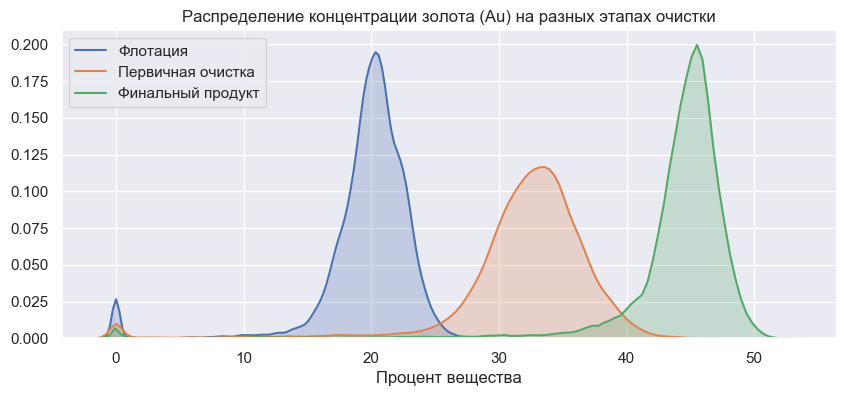

In [22]:
sns.set(rc={'figure.figsize':(10,4)})
ax = sns.kdeplot(full_data['rougher.output.concentrate_au'], shade=True, label='Флотация' )
ax = sns.kdeplot(full_data['primary_cleaner.output.concentrate_au'], shade=True, label='Первичная очистка' )
ax = sns.kdeplot(full_data['final.output.concentrate_au'], shade=True, label='Финальный продукт' )
plt.title('Распределение концентрации золота (Au) на разных этапах очистки')
plt.xlabel('Процент вещества')
plt.show()

#### Серебро (Ag)

In [23]:
# оцениваем изменения концентрации Ag
concentrate_ag = train_data[['rougher.input.feed_ag',
                             'rougher.output.concentrate_ag',
                             'primary_cleaner.output.concentrate_ag',
                             'final.output.concentrate_ag']].mean()

print(f'Изменения концентрации серебра (Ag) в среднем на различных этапах очистки:\n {concentrate_ag}')

Изменения концентрации серебра (Ag) в среднем на различных этапах очистки:
 rougher.input.feed_ag                     8.579195
rougher.output.concentrate_ag            11.775812
primary_cleaner.output.concentrate_ag     8.200916
final.output.concentrate_ag               5.141921
dtype: float64


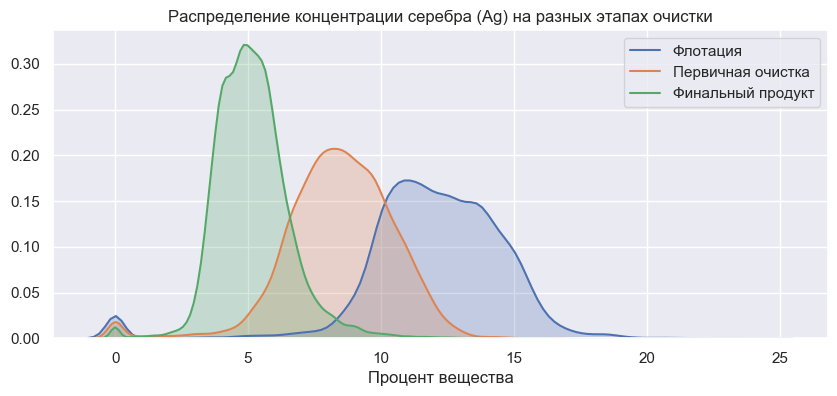

In [24]:
sns.set(rc={'figure.figsize':(10,4)})
ax = sns.kdeplot(full_data['rougher.output.concentrate_ag'], shade=True, label='Флотация' )
ax = sns.kdeplot(full_data['primary_cleaner.output.concentrate_ag'], shade=True, label='Первичная очистка' )
ax = sns.kdeplot(full_data['final.output.concentrate_ag'], shade=True, label='Финальный продукт' )
plt.title('Распределение концентрации серебра (Ag) на разных этапах очистки')
plt.xlabel('Процент вещества')
plt.show()

#### Свинец (Pb)

In [25]:
# оцениваем изменения концентрации Pb
concentrate_pb = train_data[['rougher.input.feed_pb',
                             'rougher.output.concentrate_pb',
                             'primary_cleaner.output.concentrate_pb',
                             'final.output.concentrate_pb']].mean()

print(f'Изменения концентрации свинца (Pb) в среднем на различных этапах очистки:\n {concentrate_pb}')

Изменения концентрации свинца (Pb) в среднем на различных этапах очистки:
 rougher.input.feed_pb                     3.505465
rougher.output.concentrate_pb             7.664555
primary_cleaner.output.concentrate_pb     9.568544
final.output.concentrate_pb              10.132848
dtype: float64


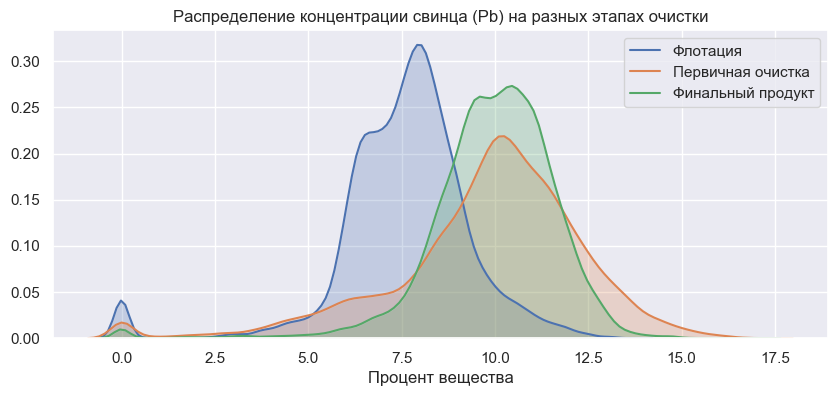

In [26]:
sns.set(rc={'figure.figsize':(10,4)})
ax = sns.kdeplot(full_data['rougher.output.concentrate_pb'], shade=True, label='Флотация' )
ax = sns.kdeplot(full_data['primary_cleaner.output.concentrate_pb'], shade=True, label='Первичная очистка' )
ax = sns.kdeplot(full_data['final.output.concentrate_pb'], shade=True, label='Финальный продукт' )
plt.title('Распределение концентрации свинца (Pb) на разных этапах очистки')
plt.xlabel('Процент вещества')
plt.show()

#### Выводы

**Из вычислений проведённых выше, и на выведенных графиках, мы видим, что концентрация золота (Au) в среднем на каждом этапе очистки увеличивается: 7 единиц при поступлении в первичную обработку (сырье), 19 единиц после флотации, 32 единиц после первой очистки, и 44 единицы после второй очистки. Также в среднем увеличивается концентрация свинца (Pb): 3 единицы в сырье, 7 единиц после флотации, 9 единиц после первой очистки, 10 единиц после второй очистки. А концентрация серебра (Ag) в среднем уменьшается: 11 единиц после флотации, 8 единиц после первой очистки, и 5 единиц после второй очистки.**

### Размеры гранул сырья

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения будут сильно отличатся друг от друга, тогда оценка нашей будущей модели будет неправильной. </div>

In [27]:
# заносим в переменные средний размер гранул сырья по обучающей и тестовой выборке
granule_size_train = train_data[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']].mean()
granule_size_test = test_data[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']].mean()

# выводим на экран размеры гранул
print(f'Средние размеры гранул сырья на обучающей выборке:\n {granule_size_train}')
print(f'Средние размеры гранул сырья на тестовой выборке:\n {granule_size_test}')

Средние размеры гранул сырья на обучающей выборке:
 rougher.input.feed_size            60.239856
primary_cleaner.input.feed_size     7.322310
dtype: float64
Средние размеры гранул сырья на тестовой выборке:
 rougher.input.feed_size            55.952754
primary_cleaner.input.feed_size     7.266339
dtype: float64


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> Как мы видим из выведенных выше цифр, что распределения размеров гранул сырья между обучающей и тестовой выборок отличаются не сильно. Соответственно нашей(-им) модели(-ям) ничего не грозит. </div>

### Концентрация веществ

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. При возможном обнаружении аномалий постараемся избавится от них. </div>

In [28]:
# заносим в переменные суммарное количество веществ на разных стадиях обработки
feed_sum_concentrate = train_data[['rougher.input.feed_au',
                                   'rougher.input.feed_sol',
                                   'rougher.input.feed_pb',
                                   'rougher.input.feed_ag',]].sum(axis=1)

rougher_sum_concentrate = train_data[['rougher.output.concentrate_au', 
                                      'rougher.output.concentrate_sol',
                                      'rougher.output.concentrate_pb',
                                      'rougher.output.concentrate_ag']].sum(axis=1)

primary_sum_concentrate = train_data[['primary_cleaner.output.concentrate_au',
                                      'primary_cleaner.output.concentrate_sol',
                                      'primary_cleaner.output.concentrate_pb',
                                      'primary_cleaner.output.concentrate_ag']].sum(axis=1)

final_sum_concentrate = train_data[['final.output.concentrate_au',
                                    'final.output.concentrate_sol',
                                    'final.output.concentrate_pb',
                                    'final.output.concentrate_ag']].sum(axis=1)

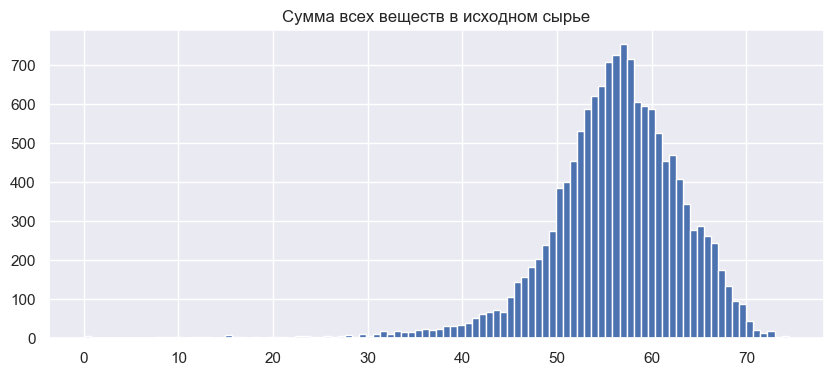

In [29]:
# выводим на экран гистограммы суммы веществ на разных стадиях обработки
feed_sum_concentrate.hist(bins=100)

plt.title('Сумма всех веществ в исходном сырье')
plt.show()

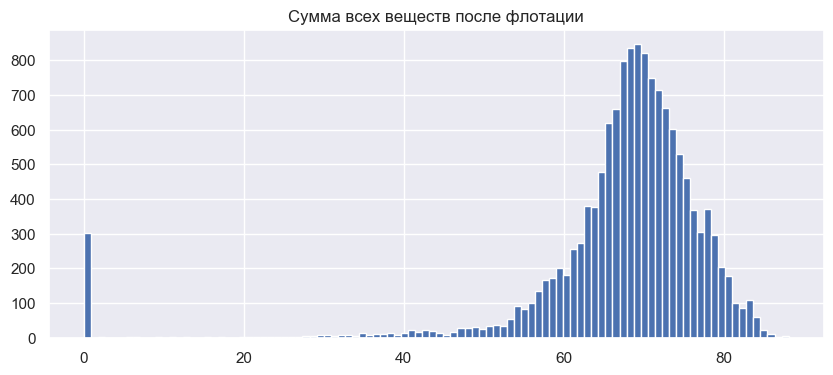

In [30]:
rougher_sum_concentrate.hist(bins=100)

plt.title('Сумма всех веществ после флотации')
plt.show()

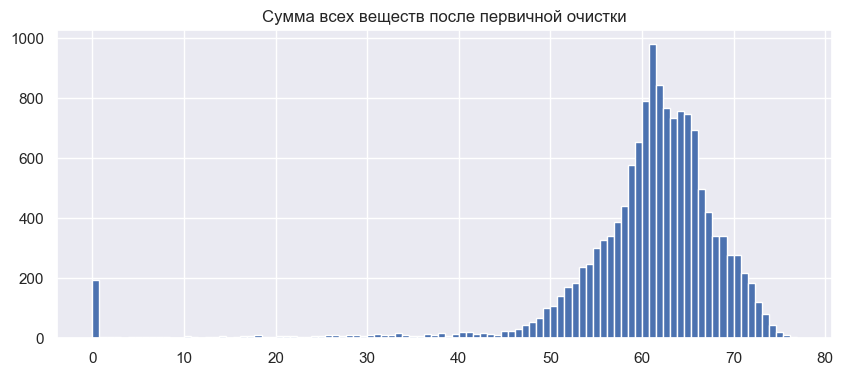

In [31]:
primary_sum_concentrate.hist(bins=100)

plt.title('Сумма всех веществ после первичной очистки')
plt.show()

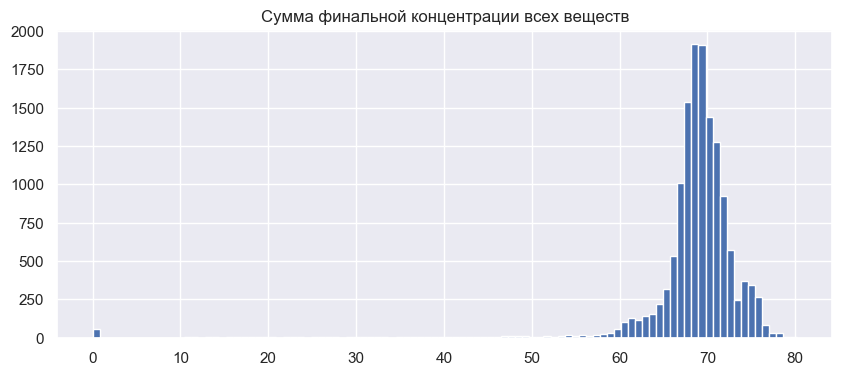

In [32]:
final_sum_concentrate.hist(bins=100)

plt.title('Сумма финальной концентрации всех веществ')
plt.show()

In [33]:
# удаляем аномальные значения ниже 0,5 в полной выборке с помощью фильтра
filter_full_data = ((full_data[['rougher.input.feed_au',
                                'rougher.input.feed_sol',
                                'rougher.input.feed_pb',
                                'rougher.input.feed_ag']].sum(axis=1) >= 0.5) &
                    (full_data[['rougher.output.concentrate_au', 
                                'rougher.output.concentrate_sol',
                                'rougher.output.concentrate_pb', 
                                'rougher.output.concentrate_ag']].sum(axis=1) >= 0.5) &
                    (full_data[['primary_cleaner.output.concentrate_au', 
                                'primary_cleaner.output.concentrate_sol',
                                'primary_cleaner.output.concentrate_pb', 
                                'primary_cleaner.output.concentrate_ag']].sum(axis=1) >= 0.5) &
                    (full_data[['final.output.concentrate_au', 
                                'final.output.concentrate_sol',
                                'final.output.concentrate_pb', 
                                'final.output.concentrate_ag']].sum(axis=1) >= 0.5))

# применяем фильтр к полной выборке
full_data = full_data[filter_full_data]

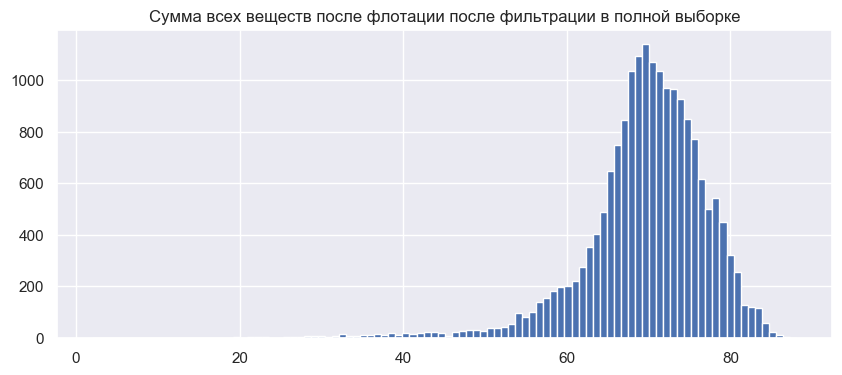

In [34]:
# проверяем отработку нашего фильтра по полной выборке
full_filter_rougher_sum_concentrate = full_data[['rougher.output.concentrate_au',
                                                 'rougher.output.concentrate_sol',
                                                 'rougher.output.concentrate_pb',
                                                 'rougher.output.concentrate_ag']].sum(axis=1)

# строим гистограмму
full_filter_rougher_sum_concentrate.hist(bins=100)

plt.title('Сумма всех веществ после флотации после фильтрации в полной выборке')
plt.show()

In [35]:
# удаляем аномальные значения ниже 0,5 единиц в обучающей выборке
filter_train_data = ((train_data[['rougher.input.feed_au',
                                  'rougher.input.feed_sol',
                                  'rougher.input.feed_pb',
                                  'rougher.input.feed_ag']].sum(axis=1) >= 0.5) &
                     (train_data[['rougher.output.concentrate_au',
                                  'rougher.output.concentrate_sol',
                                  'rougher.output.concentrate_pb',
                                  'rougher.output.concentrate_ag']].sum(axis=1) >= 0.5) &
                     (train_data[['primary_cleaner.output.concentrate_au',
                                  'primary_cleaner.output.concentrate_sol',
                                  'primary_cleaner.output.concentrate_pb',
                                  'primary_cleaner.output.concentrate_ag']].sum(axis=1) >= 0.5) &
                     (train_data[['final.output.concentrate_au',
                                  'final.output.concentrate_sol',
                                  'final.output.concentrate_pb',
                                  'final.output.concentrate_ag']].sum(axis=1) >= 0.5))

# применяем фильтр к обучающей выборке
train_data = train_data[filter_train_data]

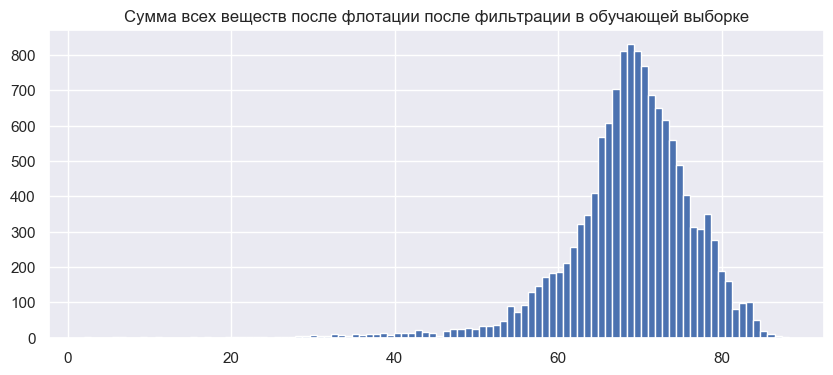

In [36]:
# проверяем отработку нашего фильтра по обучающей выборке
train_filter_rougher_sum_concentrate = train_data[['rougher.output.concentrate_au',
                                                   'rougher.output.concentrate_sol',
                                                   'rougher.output.concentrate_pb',
                                                   'rougher.output.concentrate_ag']].sum(axis=1)

# строим гистограмму
train_filter_rougher_sum_concentrate.hist(bins=100)

plt.title('Сумма всех веществ после флотации после фильтрации в обучающей выборке')
plt.show()

## Модель

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> Далее перед тем как начать обучать и тестировать наши модели, мы дополним тестовую выборку целевыми столбцами оценки эффектинвости обогащения после флотации, и в конечном продукте. </div>

In [37]:
# добавляем целевые признаки к тестовой выборки из полной выборки
test_data = test_data.merge(full_data[['date', 
                                       'rougher.output.recovery', 
                                       'final.output.recovery']], on='date')

In [38]:
# проверяем присоединение столбцов
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.5

In [39]:
# удаляем столбцы с датой и нашей проведённой ранее проверкой эффективности обогащения
full_data.drop('date', axis=1, inplace=True)
train_data.drop(['date', 'recovery'], axis=1, inplace=True)
test_data.drop('date', axis=1, inplace=True)

# выводим результат на экран
display(full_data.head())
display(train_data.head())
display(test_data.head())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.497069,19.369147,34.118526,16.250511,3.049646

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.497069,19.369147,34.118526,16.250511,3.049646

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.74672

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> Перед будущим обучением моделей, напишем функцию итоговой sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»). </div>

In [40]:
# функция вычисления sMAPE
def final_sMAPE(targets, predictions):
    targets = targets.to_numpy()
    rougher_target = targets[:, 0]
    final_target = targets[:, 1]
    rougher_predict = predictions[:, 0]
    final_predict = predictions[:, 1]
    
    rougher_sMAPE = (abs(rougher_target - rougher_predict) / 
                     ((abs(rougher_target) + abs(rougher_predict)) / 2)).sum() / len(rougher_target) * 100
    
    final_sMAPE = (abs(final_target - final_predict) / 
                   ((abs(final_target) + abs(final_predict)) / 2)).sum() / len(rougher_target) * 100
    
    return .25 * rougher_sMAPE + .75 * final_sMAPE

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> Теперь обучим разные модели и оценим их качество кросс-валидацией. После выберим лучшую модель и проверим её на тестовой выборке. </div>

In [41]:
# заносим в переменные признаки и целевые значения
features_train = train_data[test_data.columns]

targets_train = train_data[['rougher.output.recovery', 'final.output.recovery']]

In [42]:
# перед тем, как обучать модель кросс-валидацией создадим оценщик из нашей функции выше
sMAPE_scorer = make_scorer(final_sMAPE, greater_is_better=False)

In [43]:
RANDOM_STATE = 12345
CV = 5
models = [LinearRegression(),
          DecisionTreeRegressor(random_state=RANDOM_STATE),
          RandomForestRegressor(random_state=RANDOM_STATE),
          ExtraTreesRegressor(random_state=RANDOM_STATE),
          DummyRegressor()]


results_cross_val = []

for model in models: 
    
    scorer = sMAPE_scorer
    
    cross_val_score_train = cross_val_score(model,
                                      features_train,
                                      targets_train,
                                      cv=CV,
                                      scoring=scorer).mean()

    results_cross_val.append({'model name': model.__class__.__name__,
                              'cross_val_score': cross_val_score_train}) 
              
pd.DataFrame(results_cross_val)

,model name,cross_val_score
0,LinearRegression,-8.613477e-14
1,DecisionTreeRegressor,-6.513137e-01
2,RandomForestRegressor,-3.643983e-01
3,ExtraTreesRegressor,-7.058117e-01
4,DummyRegressor,-9.643499e+00


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> Из всех вышеобученных моделей наиболее лучшие оценки показала модель фиктивного регрессора - DummyRegressor. Ниже её и будем тестировать. </div>

### Тестирование модели

In [44]:
# заносим в переменные признаки и целевые признаки
features_test = test_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

targets_test = test_data[['rougher.output.recovery', 'final.output.recovery']]

In [45]:
# тестируем ранее обученную модель
DR_model_score = cross_val_score(DummyRegressor(strategy='mean'), features_test, targets_test, scoring = sMAPE_scorer, cv=5)

print(f'Оценка фиктивного регрессора = {DR_model_score.mean():.2f}')

Оценка фиктивного регрессора = -7.05


#### Вывод

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid">
    
Судя по тому, что модели выдают отрицательные значения метрик, в данных закрались существенные ошибки. О которых стоило бы сообщить заказчику.
    
В результате работы над проектом с данными, что нам предоставил закачик нами была выбрана модель обучения `DummyRegressor` - фиктивного регрессора. 

</div>